In [2]:
#import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [3]:
#config the parameters for random generation

avg=1
std_dev=.1
num_reps=500
num_simulations=1000

In [4]:
#assume the (percent to plan) is from normal distribution

pct_to_target=np.random.normal(avg,std_dev,num_reps).round(2)

In [5]:
pct_to_target[1:10]

array([1.02, 1.07, 1.06, 1.15, 0.97, 0.89, 1.03, 1.07, 0.98])

In [6]:
#sales target values

sales_target_values = [75000, 100000, 200000, 300000, 400000, 500000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
sales_target[1:10]

array([200000, 200000, 100000, 400000, 200000,  75000, 500000, 200000,
       400000])

In [11]:
#historical data

df=pd.DataFrame(index=range(num_reps), data={'Percent_to_Plan':pct_to_target, 'Sales_Target':sales_target})
df['Actual_Sales'] = df['Percent_to_Plan'] * df['Sales_Target']
df

,Percent_to_Plan,Sales_Target,Actual_Sales
0,1.17,100000,117000.0
1,1.02,200000,204000.0
2,1.07,200000,214000.0
3,1.06,100000,106000.0
4,1.15,400000,460000.0
...,...,...,...
495,1.16,200000,232000.0
496,0.87,75000,65250.0
497,0.83,200000,166000.0
498,1.04,100000,104000.0


In [8]:
#commission rate

def calc_commission_rate(x):
        """ Return the commision rate based on the table:
        0-90% = 2%
        91-99% = 3%
        >=100 = 4%
        """
        if x<= .90:
            return .02
        if x<= .99:
            return .03
        else:
            return .04

In [12]:
#all

df['Commission_Rate']=df['Percent_to_Plan'].apply(calc_commission_rate)
df['Commission_Amount']=df['Commission_Rate']*df['Actual_Sales']
df

,Percent_to_Plan,Sales_Target,Actual_Sales,Commission_Rate,Commission_Amount
0,1.17,100000,117000.0,0.04,4680.0
1,1.02,200000,204000.0,0.04,8160.0
2,1.07,200000,214000.0,0.04,8560.0
3,1.06,100000,106000.0,0.04,4240.0
4,1.15,400000,460000.0,0.04,18400.0
...,...,...,...,...,...
495,1.16,200000,232000.0,0.04,9280.0
496,0.87,75000,65250.0,0.02,1305.0
497,0.83,200000,166000.0,0.02,3320.0
498,1.04,100000,104000.0,0.04,4160.0


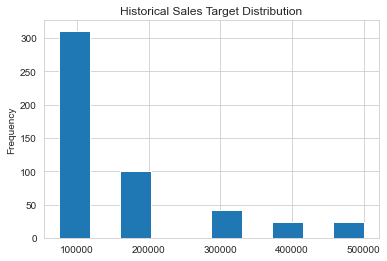

In [14]:
#plot Sales Target

plt.title("Historical Sales Target Distribution") 
df['Sales_Target'].plot(kind='hist', title='Historical Sales Target Distribution')
plt.show()

In [15]:
#sum up Commission_Amount (top 5 above)

df['Commission_Amount'].iloc[0:5].sum()

44040.0

In [18]:
#repeat generation from normal distribution

all_stats=[]

for i in range(num_simulations):
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    Percent_to_Plan = np.random.normal(avg, std_dev, num_reps).round(2)
    
    df = pd.DataFrame(index=range(num_reps), data={'Percent_to_Plan': Percent_to_Plan,
                                                   'Sales_Target': sales_target})
    
    df['Actual_Sales'] = df['Percent_to_Plan'] * df['Sales_Target']
    
    df['Commission_Rate'] = df['Percent_to_Plan'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Actual_Sales']
    
    all_stats.append([df['Actual_Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [20]:
#check

all_stats

[[80160750.0, 2683275.0, 80975000],
 [80560000.0, 2737482.0, 80600000],
 [86326750.0, 2964625.0, 85975000],
 [81785000.0, 2820500.0, 81750000],
 [83093000.0, 2839978.0, 82850000],
 [83572000.0, 2790532.0, 84175000],
 [81760500.0, 2782615.0, 81900000],
 [85500500.0, 2949365.0, 85450000],
 [76885250.0, 2648068.0, 76800000],
 [85216000.0, 2895380.0, 85575000],
 [85337500.0, 2916052.0, 85675000],
 [83824750.0, 2879062.0, 84225000],
 [83059250.0, 2858978.0, 82625000],
 [81287250.0, 2751315.0, 81425000],
 [81537500.0, 2772048.0, 81850000],
 [81981250.0, 2774455.0, 82175000],
 [85417000.0, 2889700.0, 85450000],
 [84779500.0, 2939812.0, 84025000],
 [86540000.0, 2988860.0, 86025000],
 [84247250.0, 2903940.0, 83625000],
 [81324250.0, 2759052.0, 81625000],
 [87198500.0, 2961445.0, 87650000],
 [83490000.0, 2893548.0, 82900000],
 [87852500.0, 3019958.0, 87475000],
 [87210000.0, 2933192.0, 88150000],
 [82624500.0, 2832198.0, 82650000],
 [86665000.0, 2972952.0, 86425000],
 [87067000.0, 2992832.0, 865

In [27]:
#makes dataframe

results_df = pd.DataFrame.from_records(all_stats, columns=['Acutal_Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])
results_df

,Acutal_Sales,Commission_Amount,Sales_Target
0,80160750.0,2683275.0,80975000
1,80560000.0,2737482.0,80600000
2,86326750.0,2964625.0,85975000
3,81785000.0,2820500.0,81750000
4,83093000.0,2839978.0,82850000
...,...,...,...
995,83153750.0,2810775.0,83500000
996,85442500.0,2938202.0,84975000
997,79317000.0,2712102.0,79050000
998,94596000.0,3246820.0,94050000


In [28]:
#makes thousands
#Commission Amount: average: 2.86M, std: 2795K, min: 2.5M, max: 3.2M

results_df.describe().style.format('{:,}')

,Acutal_Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,884,848.25","2,863,441.222","83,881,000.0"
std,"2,795,573.3461345737","104,699.32893953573","2,760,391.2784259426"
min,"74,042,500.0","2,519,395.0","74,275,000.0"
25%,"82,040,000.0","2,791,489.0","82,075,000.0"
50%,"83,754,125.0","2,864,864.0","83,825,000.0"
75%,"85,783,312.5","2,934,460.0","85,700,000.0"
max,"94,596,000.0","3,246,820.0","94,050,000.0"


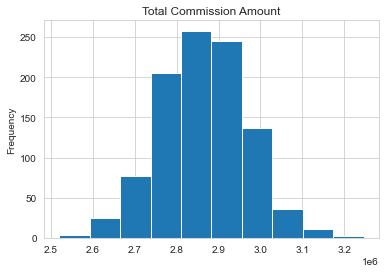

In [29]:
#plot Total Commission Amount

results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")
plt.show()